In [217]:
# import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')


In [218]:
df = pd.read_csv('NFLX.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-02,325.000000,326.070007,315.619995,317.549988,317.549988,4318600
1,2023-05-03,317.549988,324.619995,315.850006,319.299988,319.299988,5064100
2,2023-05-04,319.010010,323.609985,317.950012,320.779999,320.779999,3879700
3,2023-05-05,323.609985,324.149994,319.440002,322.760010,322.760010,3988600
4,2023-05-08,322.989990,332.559998,322.029999,331.209991,331.209991,5488600


In [219]:
df.shape


(252, 7)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [221]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,470.119007,476.123174,464.385041,470.157342,470.157342,5.376840e+06
std,85.232755,85.665102,84.281683,85.110898,85.110898,3.701215e+06
min,317.549988,323.609985,315.619995,317.549988,317.549988,1.404700e+06
25%,411.855003,418.457496,407.092499,411.580001,411.580001,3.341200e+06
50%,444.729996,448.574997,439.175003,444.944992,444.944992,4.335350e+06
75%,553.085006,562.604996,549.095001,555.059982,555.059982,6.098900e+06
max,636.390015,639.000000,628.109985,636.179993,636.179993,2.807440e+07


### EDA

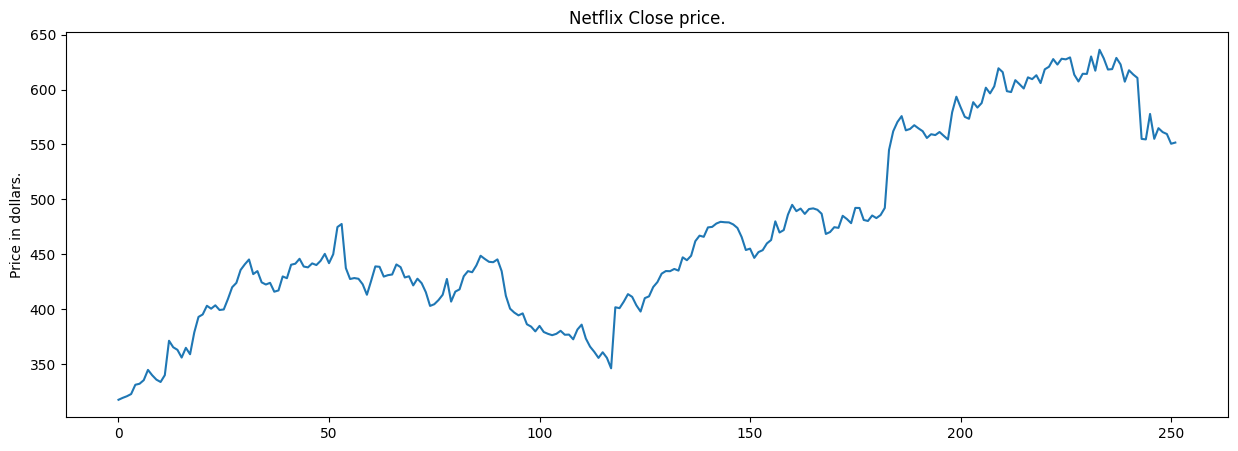

In [222]:
# plot a graph
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Netflix Close price.')
plt.ylabel('Price in dollars.')
plt.show()


In [223]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-02,325.000000,326.070007,315.619995,317.549988,317.549988,4318600
1,2023-05-03,317.549988,324.619995,315.850006,319.299988,319.299988,5064100
2,2023-05-04,319.010010,323.609985,317.950012,320.779999,320.779999,3879700
3,2023-05-05,323.609985,324.149994,319.440002,322.760010,322.760010,3988600
4,2023-05-08,322.989990,332.559998,322.029999,331.209991,331.209991,5488600


### we have same data in close and adj close columns so we can drop one column - adj close

In [224]:
# drop duplicate column
df = df.drop(['Adj Close'], axis=1)


In [225]:
# missing values

df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

 **there is no missing values in the provided dataset**

histogram and dist plot

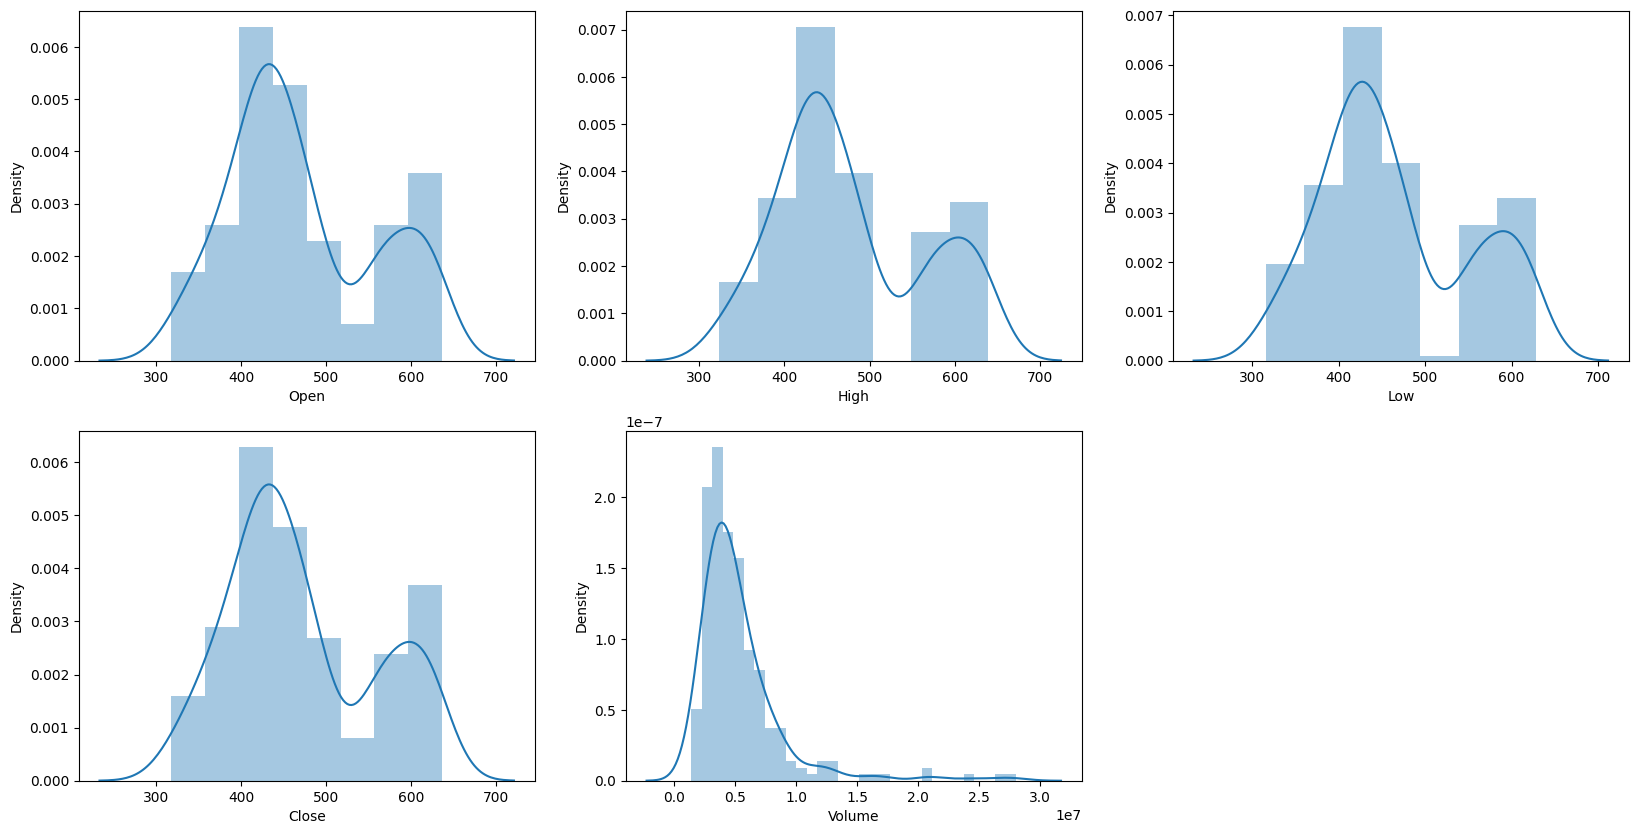

In [226]:

features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()


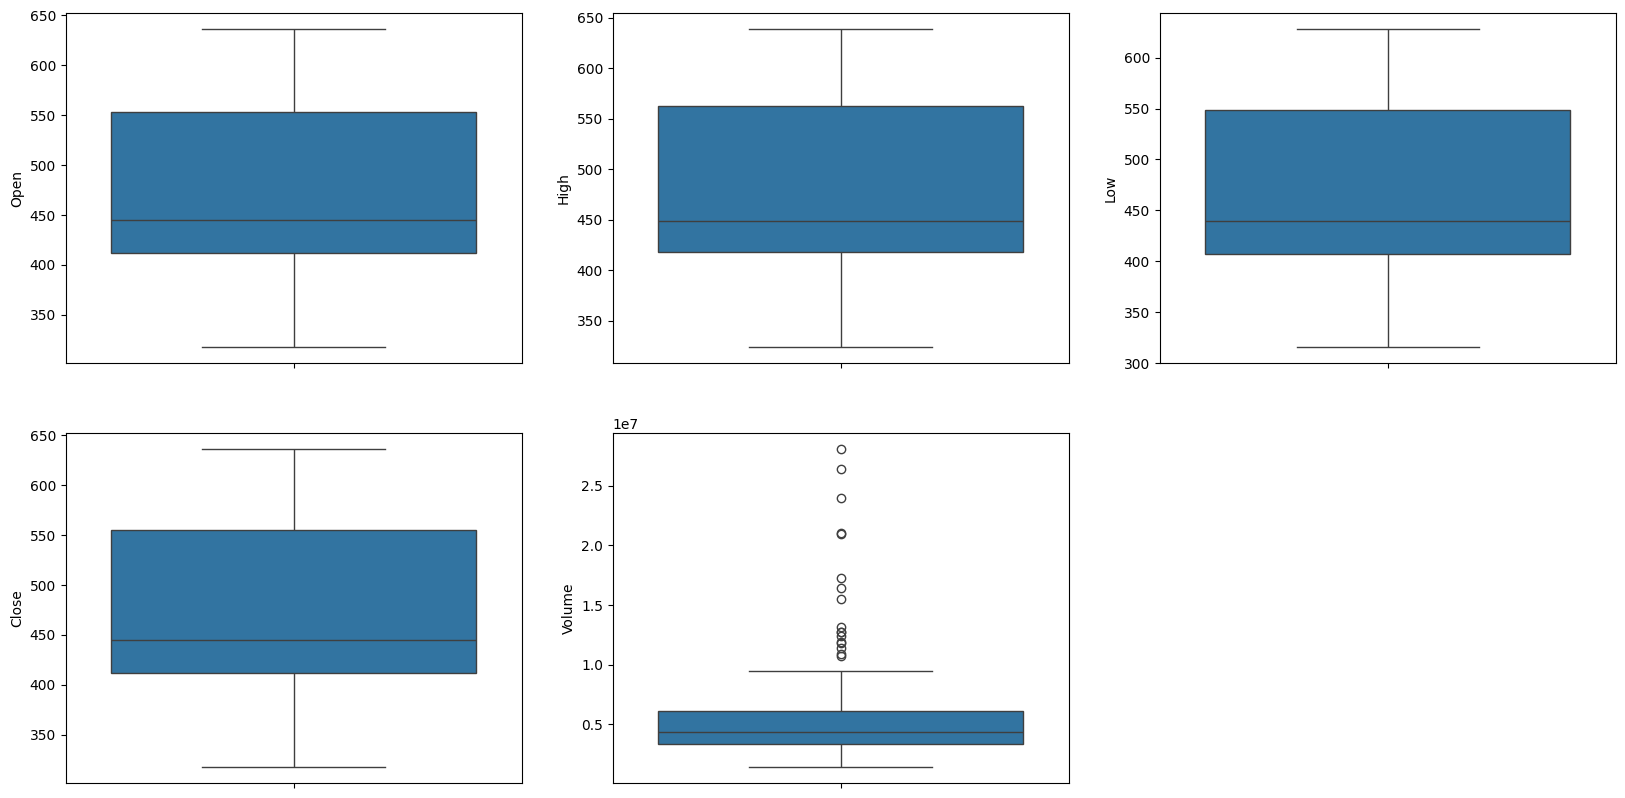

In [227]:
# box plot
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()


In [228]:
# split the date into date,month,year

splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()


,Date,Open,High,Low,Close,Volume,day,month,year
0,2023-05-02,325.000000,326.070007,315.619995,317.549988,4318600,2,5,2023
1,2023-05-03,317.549988,324.619995,315.850006,319.299988,5064100,3,5,2023
2,2023-05-04,319.010010,323.609985,317.950012,320.779999,3879700,4,5,2023
3,2023-05-05,323.609985,324.149994,319.440002,322.760010,3988600,5,5,2023
4,2023-05-08,322.989990,332.559998,322.029999,331.209991,5488600,8,5,2023


In [229]:
df.drop(columns=['Date'],inplace=True)

In [230]:
# create a quarter end
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,325.000000,326.070007,315.619995,317.549988,4318600,2,5,2023,0
1,317.549988,324.619995,315.850006,319.299988,5064100,3,5,2023,0
2,319.010010,323.609985,317.950012,320.779999,3879700,4,5,2023,0
3,323.609985,324.149994,319.440002,322.760010,3988600,5,5,2023,0
4,322.989990,332.559998,322.029999,331.209991,5488600,8,5,2023,0


In [231]:
print(df.dtypes)


Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
day                 int64
month               int64
year                int64
is_quarter_end      int64
dtype: object


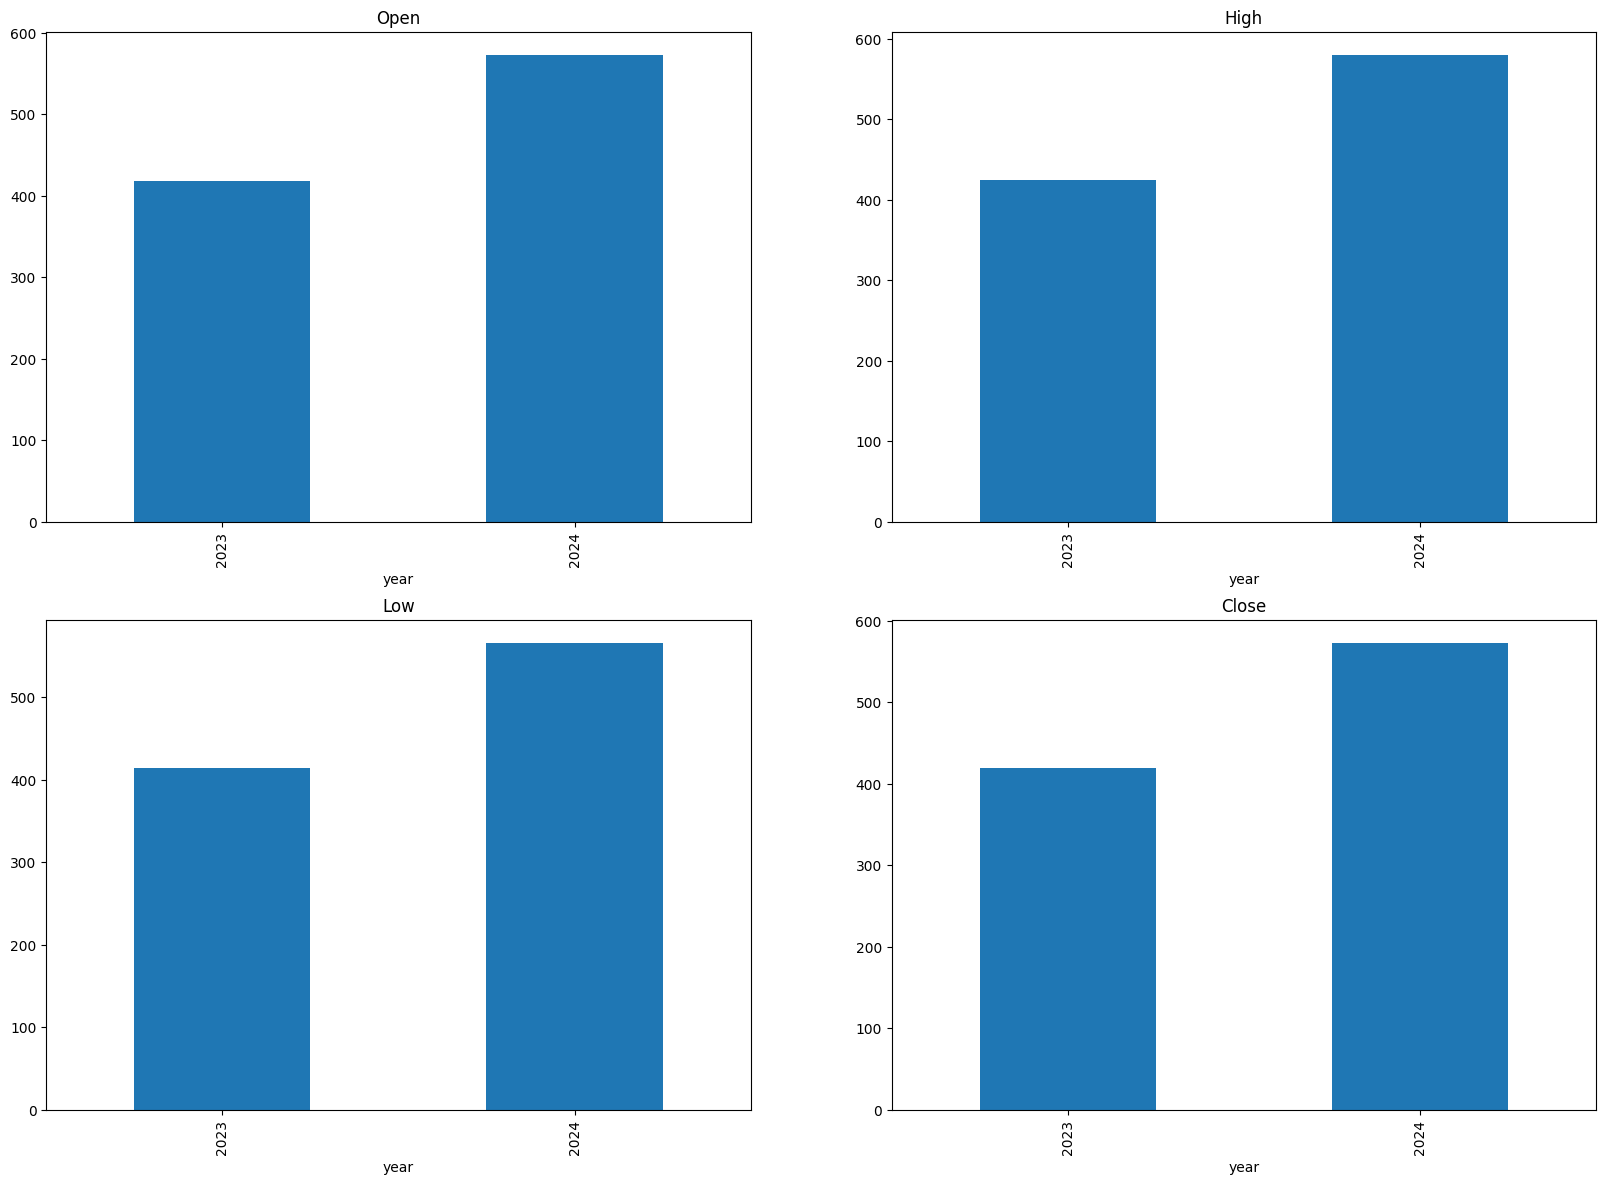

In [232]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,14))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
  plt.title(col)
plt.show()


In [233]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,465.672806,471.906549,460.037252,466.206199,5.654400e+06,15.707602,6.046784,2023.374269
1,479.505433,485.024939,473.563706,478.498643,4.790881e+06,15.666667,7.481481,2023.246914


In [234]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


In [235]:
df.sample(5)

,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
165,491.239990,494.019989,489.250000,491.790009,2561300,27,12,2023,1,-0.550019,-4.769989,0
147,475.309998,478.589996,470.420013,473.970001,4287300,30,11,2023,0,1.339997,-8.169983,0
77,409.000000,415.739990,407.399994,413.170013,3603300,22,8,2023,0,-4.170013,-8.339996,1
198,567.260010,581.250000,564.340027,579.330017,5634200,14,2,2024,0,-12.070007,-16.909973,1
8,344.760010,348.170013,337.359985,339.890015,6079900,12,5,2023,0,4.869995,-10.810028,0


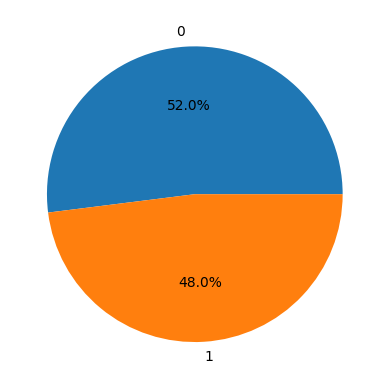

In [236]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


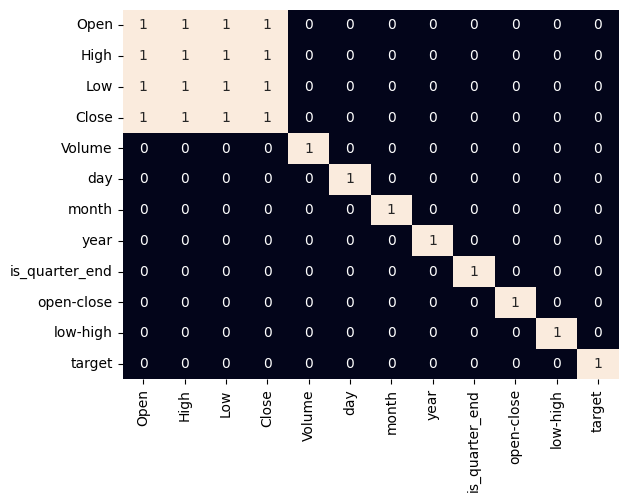

In [237]:
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

### Data Splitting and Normalization

In [238]:
X = df[['open-close', 'low-high', 'is_quarter_end']]
y = df['target']

In [239]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [240]:
X_train, X_test, Y_train, Y_test = train_test_split(
	X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)


(201, 3) (51, 3)


In [241]:
models = [LogisticRegression(max_iter=200,random_state=42), SVC(
kernel='poly', probability=True),DecisionTreeClassifier(max_depth=6,min_samples_split=2,random_state=42,criterion='gini')]

for i in range(3):
  models[i].fit(X_train, Y_train)
  y_pred=models[i].predict(X_test)


  print(f'{models[i]} : ')
  print('Accuracy',accuracy_score(y_pred , Y_test))
  print('Prescision',precision_score(y_pred , Y_test))
  print('Recall',recall_score(y_pred , Y_test))
  print('F1 Score',f1_score(y_pred , Y_test))
  print()











  # print('Training Accuracy : ', metrics.roc_auc_score(
  #   Y_train, models[i].predict_proba(X_train)[:,1]))
  # print('Testing Accuracy : ', metrics.roc_auc_score(
  #   Y_test, models[i].predict_proba(X_test)[:,1]))
  # print()


LogisticRegression(max_iter=200, random_state=42) : 
Accuracy 0.5098039215686274
Prescision 0.5769230769230769
Recall 0.5172413793103449
F1 Score 0.5454545454545454

SVC(kernel='poly', probability=True) : 
Accuracy 0.5098039215686274
Prescision 0.7692307692307693
Recall 0.5128205128205128
F1 Score 0.6153846153846154

DecisionTreeClassifier(max_depth=6, random_state=42) : 
Accuracy 0.49019607843137253
Prescision 0.5384615384615384
Recall 0.5
F1 Score 0.5185185185185186

